**Overview of the pipeline**

![](https://hbctraining.github.io/Intro-to-rnaseq-hpc-O2/img/RNAseqWorkflow.png)

Download and install tools

In [ ]:
# Install kallisto and bustools

!wget https://github.com/pachterlab/kallisto/releases/download/v0.46.0/kallisto_linux-v0.46.0.tar.gz
!tar -xf kallisto_linux-v0.46.0.tar.gz
!cp kallisto/kallisto /usr/local/bin/

!wget https://github.com/BUStools/bustools/releases/download/v0.39.3/bustools_linux-v0.39.3.tar.gz
!tar -xf bustools_linux-v0.39.3.tar.gz
!cp bustools/bustools /usr/local/bin/

In [ ]:
# Download mouse genome
!wget https://github.com/BUStools/getting_started/releases/download/getting_started/Mus_musculus.GRCm38.cdna.all.idx.gz
!gunzip Mus_musculus.GRCm38.cdna.all.idx.gz

# get the whitelist and tx to gene file
!wget https://github.com/BUStools/getting_started/releases/download/getting_started/10xv2_whitelist.txt
!wget https://github.com/BUStools/getting_started/releases/download/getting_started/transcripts_to_genes.txt

In [ ]:
# Download fastqc

!wget -c http://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.5.zip
!unzip fastqc_v0.11.5.zip
!cd FastQC
!chmod +x FastQC/fastqc

Perform FastaQC analysis on the read

In [ ]:
# Download reads
!wget https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-248_rna-seq_Mmus_C57-6T_LNG_FLT_ISS-T_Rep1_F1_R1_raw.fastq.gz?version=1 -O GLDS-248_rna-seq_Mmus_C57-6T_LNG_FLT_ISS-T_Rep1_F1_R1_raw.fastq.gz
!wget https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-248_rna-seq_Mmus_C57-6T_LNG_FLT_ISS-T_Rep1_F1_R2_raw.fastq.gz?version=1 -O GLDS-248_rna-seq_Mmus_C57-6T_LNG_FLT_ISS-T_Rep1_F1_R2_raw.fastq.gz

In [ ]:
#!FastQC/fastqc ./GLDS-248_rna-seq_Mmus_C57-6T_LNG_FLT_ISS-T_Rep1_F1_R1_raw.fastq.gz
!FastQC/fastqc ./GLDS-248_rna-seq_Mmus_C57-6T_LNG_FLT_ISS-T_Rep1_F1_R2_raw.fastq.gz

Load RNA sequence stream and pseudoalgin the reads

Lung Tissue:

In [ ]:
!\
urlR1="https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-248_rna-seq_Mmus_C57-6T_LNG_FLT_ISS-T_Rep1_F1_R1_raw.fastq.gz?version=1"; \
urlR2="https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-248_rna-seq_Mmus_C57-6T_LNG_FLT_ISS-T_Rep1_F1_R2_raw.fastq.gz?version=1"; \
time kallisto bus -i Mus_musculus.GRCm38.cdna.all.idx -x 10xv2 -t 2 -o bus_out/ <(curl -Ls ${urlR1}) <(curl -Ls ${urlR2})

In [ ]:
!\
urlR1="https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-248_rna-seq_Mmus_C57-6T_LNG_FLT_ISS-T_Rep2_F2_R1_raw.fastq.gz?version=1"; \
urlR2="https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-248_rna-seq_Mmus_C57-6T_LNG_FLT_ISS-T_Rep2_F2_R2_raw.fastq.gz?version=1"; \
time kallisto bus -i Mus_musculus.GRCm38.cdna.all.idx -x 10xv2 -t 2 -o bus_out/ <(curl -Ls ${urlR1}) <(curl -Ls ${urlR2})

In [ ]:
!\
urlR1="https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-248_rna-seq_Mmus_C57-6T_LNG_FLT_ISS-T_Rep3_F3_R1_raw.fastq.gz?version=1"; \
urlR2="https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-248_rna-seq_Mmus_C57-6T_LNG_FLT_ISS-T_Rep3_F3_R2_raw.fastq.gz?version=1"; \
time kallisto bus -i Mus_musculus.GRCm38.cdna.all.idx -x 10xv2 -t 2 -o bus_out/ <(curl -Ls ${urlR1}) <(curl -Ls ${urlR2})


[index] k-mer length: 31
[index] number of targets: 118,489
[index] number of k-mers: 100,614,952
tcmalloc: large alloc 3221225472 bytes == 0x22f4000 @  0x7fc511ab11e7 0x6f181d 0x6f1899 0x4acad9 0x4a6c50 0x44e31c 0x7fc510acdb97 0x452a59
[index] number of equivalence classes: 433,624
[quant] will process sample 1: /dev/fd/63
                               /dev/fd/62
[quant] finding pseudoalignments for the reads ... done
[quant] processed 87,115,183 reads, 56,560,365 reads pseudoaligned

real	17m19.240s
user	30m13.206s
sys	0m54.988s


Colon tissue:

In [ ]:
!\
urlR1="https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-247_rna-seq_Mmus_C57-6T_CLN_FLT_ISS-T_Rep1_F1_R1_raw.fastq.gz?version=1"; \
urlR2="https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-247_rna-seq_Mmus_C57-6T_CLN_FLT_ISS-T_Rep1_F1_R2_raw.fastq.gz?version=1"; \
time kallisto bus -i Mus_musculus.GRCm38.cdna.all.idx -x 10xv2 -t 2 -o bus_out/ <(curl -Ls ${urlR1}) <(curl -Ls ${urlR2})


[index] k-mer length: 31
[index] number of targets: 118,489
[index] number of k-mers: 100,614,952
tcmalloc: large alloc 3221225472 bytes == 0x1e4a000 @  0x7f4b97d1b1e7 0x6f181d 0x6f1899 0x4acad9 0x4a6c50 0x44e31c 0x7f4b96d37b97 0x452a59
[index] number of equivalence classes: 433,624
[quant] will process sample 1: /dev/fd/63
                               /dev/fd/62
[quant] finding pseudoalignments for the reads ... done
[quant] processed 86,040,553 reads, 36,141,168 reads pseudoaligned

real	22m7.243s
user	40m5.359s
sys	0m55.638s


In [ ]:
!\
urlR1="https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-247_rna-seq_Mmus_C57-6T_CLN_FLT_ISS-T_Rep2_F3_R1_raw.fastq.gz?version=1"; \
urlR2="https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-247_rna-seq_Mmus_C57-6T_CLN_FLT_ISS-T_Rep2_F3_R2_raw.fastq.gz?version=1"; \
time kallisto bus -i Mus_musculus.GRCm38.cdna.all.idx -x 10xv2 -t 2 -o bus_out/ <(curl -Ls ${urlR1}) <(curl -Ls ${urlR2})


[index] k-mer length: 31
[index] number of targets: 118,489
[index] number of k-mers: 100,614,952
tcmalloc: large alloc 3221225472 bytes == 0x3024000 @  0x7f1f94e2d1e7 0x6f181d 0x6f1899 0x4acad9 0x4a6c50 0x44e31c 0x7f1f93e49b97 0x452a59
[index] number of equivalence classes: 433,624
[quant] will process sample 1: /dev/fd/63
                               /dev/fd/62
[quant] finding pseudoalignments for the reads ... done
[quant] processed 96,935,794 reads, 54,742,631 reads pseudoaligned

real	21m27.623s
user	39m30.579s
sys	1m2.533s


In [ ]:
!\
urlR1="https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-247_rna-seq_Mmus_C57-6T_CLN_FLT_ISS-T_Rep3_F4_R1_raw.fastq.gz?version=1"; \
urlR2="https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-247_rna-seq_Mmus_C57-6T_CLN_FLT_ISS-T_Rep3_F4_R2_raw.fastq.gz?version=1"; \
time kallisto bus -i Mus_musculus.GRCm38.cdna.all.idx -x 10xv2 -t 2 -o bus_out/ <(curl -Ls ${urlR1}) <(curl -Ls ${urlR2})


[index] k-mer length: 31
[index] number of targets: 118,489
[index] number of k-mers: 100,614,952
tcmalloc: large alloc 3221225472 bytes == 0x2cba000 @  0x7fbdaa9d41e7 0x6f181d 0x6f1899 0x4acad9 0x4a6c50 0x44e31c 0x7fbda99f0b97 0x452a59
[index] number of equivalence classes: 433,624
[quant] will process sample 1: /dev/fd/63
                               /dev/fd/62
[quant] finding pseudoalignments for the reads ... done
[quant] processed 105,937,160 reads, 56,270,525 reads pseudoaligned

real	23m25.306s
user	42m54.775s
sys	1m7.767s


Thymus tissue:

In [ ]:
!\
urlR1="https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-244_rna-seq_Mmus_C57-6T_TMS_FLT_ISS-T_Rep1_F1_R1_raw.fastq.gz?version=1"; \
urlR2="https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-244_rna-seq_Mmus_C57-6T_TMS_FLT_ISS-T_Rep1_F1_R2_raw.fastq.gz?version=1"; \
time kallisto bus -i Mus_musculus.GRCm38.cdna.all.idx -x 10xv2 -t 2 -o bus_out/ <(curl -Ls ${urlR1}) <(curl -Ls ${urlR2})


[index] k-mer length: 31
[index] number of targets: 118,489
[index] number of k-mers: 100,614,952
tcmalloc: large alloc 3221225472 bytes == 0x1c74000 @  0x7feb785c31e7 0x6f181d 0x6f1899 0x4acad9 0x4a6c50 0x44e31c 0x7feb775dfb97 0x452a59
[index] number of equivalence classes: 433,624
[quant] will process sample 1: /dev/fd/63
                               /dev/fd/62
[quant] finding pseudoalignments for the reads ... done
[quant] processed 83,907,772 reads, 36,149,091 reads pseudoaligned

real	24m23.370s
user	42m2.757s
sys	0m56.968s


In [ ]:
!\
urlR1="https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-244_rna-seq_Mmus_C57-6T_TMS_FLT_ISS-T_Rep2_F2_R1_raw.fastq.gz?version=1"; \
urlR2="https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-244_rna-seq_Mmus_C57-6T_TMS_FLT_ISS-T_Rep2_F2_R2_raw.fastq.gz?version=1"; \
time kallisto bus -i Mus_musculus.GRCm38.cdna.all.idx -x 10xv2 -t 2 -o bus_out/ <(curl -Ls ${urlR1}) <(curl -Ls ${urlR2})


[index] k-mer length: 31
[index] number of targets: 118,489
[index] number of k-mers: 100,614,952
tcmalloc: large alloc 3221225472 bytes == 0x14c4000 @  0x7f899df2b1e7 0x6f181d 0x6f1899 0x4acad9 0x4a6c50 0x44e31c 0x7f899cf47b97 0x452a59
[index] number of equivalence classes: 433,624
[quant] will process sample 1: /dev/fd/63
                               /dev/fd/62
[quant] finding pseudoalignments for the reads ... done
[quant] processed 82,619,804 reads, 41,919,984 reads pseudoaligned

real	20m0.122s
user	36m34.874s
sys	0m51.478s


In [ ]:
!\
urlR1="https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-244_rna-seq_Mmus_C57-6T_TMS_FLT_ISS-T_Rep3_F3_R1_raw.fastq.gz?version=1"; \
urlR2="https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-244_rna-seq_Mmus_C57-6T_TMS_FLT_ISS-T_Rep3_F3_R2_raw.fastq.gz?version=1"; \
time kallisto bus -i Mus_musculus.GRCm38.cdna.all.idx -x 10xv2 -t 2 -o bus_out/ <(curl -Ls ${urlR1}) <(curl -Ls ${urlR2})


[index] k-mer length: 31
[index] number of targets: 118,489
[index] number of k-mers: 100,614,952
tcmalloc: large alloc 3221225472 bytes == 0x2cca000 @  0x7f9deebb11e7 0x6f181d 0x6f1899 0x4acad9 0x4a6c50 0x44e31c 0x7f9dedbcdb97 0x452a59
[index] number of equivalence classes: 433,624
[quant] will process sample 1: /dev/fd/63
                               /dev/fd/62
[quant] finding pseudoalignments for the reads ... done
[quant] processed 105,513,182 reads, 46,599,856 reads pseudoaligned

real	29m50.372s
user	53m32.645s
sys	1m10.655s


Dorsal skin tissue:

In [ ]:
!\
urlR1="https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-243_rna-seq_Mmus_C57-6T_DSKN_FLT_ISS-T_Rep1_F1_R1_raw.fastq.gz?version=1"; \
urlR2="https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-243_rna-seq_Mmus_C57-6T_DSKN_FLT_ISS-T_Rep1_F1_R2_raw.fastq.gz?version=1"; \
time kallisto bus -i Mus_musculus.GRCm38.cdna.all.idx -x 10xv2 -t 2 -o bus_out/ <(curl -Ls ${urlR1}) <(curl -Ls ${urlR2})


[index] k-mer length: 31
[index] number of targets: 118,489
[index] number of k-mers: 100,614,952
tcmalloc: large alloc 3221225472 bytes == 0x2476000 @  0x7f3307b7e1e7 0x6f181d 0x6f1899 0x4acad9 0x4a6c50 0x44e31c 0x7f3306b9ab97 0x452a59
[index] number of equivalence classes: 433,624
[quant] will process sample 1: /dev/fd/63
                               /dev/fd/62
[quant] finding pseudoalignments for the reads ... done
[quant] processed 104,533,890 reads, 47,825,617 reads pseudoaligned

real	28m28.240s
user	53m6.618s
sys	1m6.078s


In [ ]:
!\
urlR1="https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-243_rna-seq_Mmus_C57-6T_DSKN_FLT_ISS-T_Rep2_F2_R1_raw.fastq.gz?version=1"; \
urlR2="https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-243_rna-seq_Mmus_C57-6T_DSKN_FLT_ISS-T_Rep2_F2_R2_raw.fastq.gz?version=1"; \
time kallisto bus -i Mus_musculus.GRCm38.cdna.all.idx -x 10xv2 -t 2 -o bus_out/ <(curl -Ls ${urlR1}) <(curl -Ls ${urlR2})


[index] k-mer length: 31
[index] number of targets: 118,489
[index] number of k-mers: 100,614,952
tcmalloc: large alloc 3221225472 bytes == 0x191e000 @  0x7fdf903621e7 0x6f181d 0x6f1899 0x4acad9 0x4a6c50 0x44e31c 0x7fdf8f37eb97 0x452a59
[index] number of equivalence classes: 433,624
[quant] will process sample 1: /dev/fd/63
                               /dev/fd/62
[quant] finding pseudoalignments for the reads ... done
[quant] processed 104,765,206 reads, 42,696,990 reads pseudoaligned

real	30m38.727s
user	56m8.362s
sys	1m10.224s


In [ ]:
!\
urlR1="https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-243_rna-seq_Mmus_C57-6T_DSKN_FLT_ISS-T_Rep3_F3_R1_raw.fastq.gz?version=1"; \
urlR2="https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-243_rna-seq_Mmus_C57-6T_DSKN_FLT_ISS-T_Rep3_F3_R2_raw.fastq.gz?version=1"; \
time kallisto bus -i Mus_musculus.GRCm38.cdna.all.idx -x 10xv2 -t 2 -o bus_out/ <(curl -Ls ${urlR1}) <(curl -Ls ${urlR2})


[index] k-mer length: 31
[index] number of targets: 118,489
[index] number of k-mers: 100,614,952
tcmalloc: large alloc 3221225472 bytes == 0x1e74000 @  0x7f9dc652a1e7 0x6f181d 0x6f1899 0x4acad9 0x4a6c50 0x44e31c 0x7f9dc5546b97 0x452a59
[index] number of equivalence classes: 433,624
[quant] will process sample 1: /dev/fd/63
                               /dev/fd/62
[quant] finding pseudoalignments for the reads ... done
[quant] processed 82,665,978 reads, 34,992,023 reads pseudoaligned

real	24m31.890s
user	44m27.409s
sys	0m58.616s


Generate count matrix:

In [ ]:
!time bustools correct -w 10xv2_whitelist.txt -p bus_out/output.bus | bustools sort -T bus_out/tmp/ -t 2 -p - | bustools count -o bus_out/genecount/genes -g transcripts_to_genes.txt -e bus_out/matrix.ec -t bus_out/transcripts.txt --genecounts -

tcmalloc: large alloc 4294967296 bytes == 0x1628000 @  0x7fbbd724a1e7 0x46c68d 0x46c709 0x45d143 0x43f308 0x7fbbd646ab97 0x443241
Found 737280 barcodes in the whitelist
Number of hamming dist 1 barcodes = 20550336
Processed 34992023 bus records
In whitelist = 7753
Corrected = 167247
Uncorrected = 34817023
Read in 175000 BUS records

real	0m29.235s
user	0m24.535s
sys	0m3.859s


Convert count matrix to adata:

In [ ]:
# Install scanpy

!pip install scanpy

In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np

adata = None

folder = "/content/bus_out/genecount/"
adata = sc.read_mtx(folder + "genes.mtx")
adata.obs.index = pd.read_csv(folder + "genes.barcodes.txt", header=None)[0].values
adata.var.index = pd.read_csv(folder + "genes.genes.txt", header=None)[0].values
adata.var["gene_id"] = adata.var.index.values

t2g = pd.read_csv("transcripts_to_genes.txt", header=None, names=["tid", "gene_id", "gene_name"], sep="\t")
t2g.index = t2g.gene_id
t2g = t2g.loc[~t2g.index.duplicated(keep='first')]

adata.var["gene_name"] = adata.var.gene_id.map(t2g["gene_name"])
adata.var.index = adata.var["gene_name"]

adata.var_names_make_unique()  

In [ ]:
# Check AnnData object shape
adata

AnnData object with n_obs × n_vars = 57655 × 36047
    var: 'gene_id', 'gene_name'

Basic filtering

In [ ]:
# Removes genes with 0 umi counts
adata = adata[:, np.asarray(adata.X.sum(axis=0)).reshape(-1) > 0]

adata = adata[np.asarray(adata.X.sum(axis=1)).reshape(-1) > 1]

Identify highly variable genes



Trying to set attribute `.var` of view, copying.


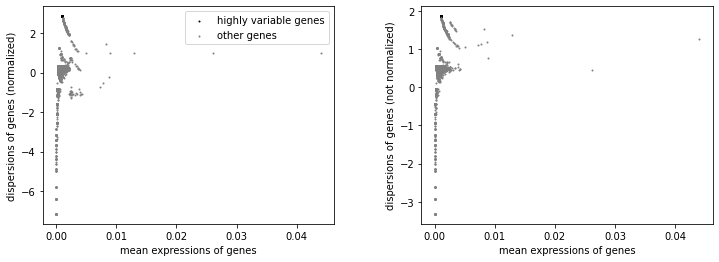

gene_name
Limch1           3.0
Herc3            3.0
Robo2            2.0
Acaa1a           1.0
Ydjc             1.0
                ... 
5430403G16Rik    1.0
F830016B08Rik    1.0
Skint9           2.0
Zfp36l2          2.0
Gm9985           2.0
Name: n_counts, Length: 7016, dtype: float32

In [ ]:
 # Only consider genes with more than 1 count
sc.pp.filter_genes(adata, min_counts=1)

# Normalization with total UMI count per cell

sc.pp.normalize_per_cell(                       
     adata, key_n_counts='n_counts_all', min_counts=1
)

# Select highly-variable genes

filter_result = sc.pp.highly_variable_genes(
    adata, min_disp=0.3,inplace=False, n_top_genes=20
)

# Log transform: adata.X = log(adata.X + 1)

sc.pp.log1p(adata)                    
sc.pp.scale(adata)   

# Plot Highly variable genes
sc.pl.highly_variable_genes(filter_result)

# Check counts per gene
adata.var['n_counts']

In [ ]:
sc.pp.log1p(adata)                    
sc.pp.highly_variable_genes(adata)

/usr/local/lib/python3.6/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:53: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/usr/local/lib/python3.6/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:84: RuntimeWarning: divide by zero encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


# Differential gene expression analysis

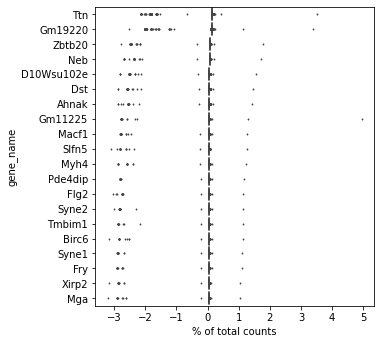

In [ ]:
sc.pl.highest_expr_genes(adata, n_top=20)

Compute neighbourhood graph - Due to the high number of dimensions the function will first calculate PCA with default parameters

In [ ]:
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=10)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [ ]:
! pip install python-igraph
! pip install louvain

Compute louvain clusters

In [ ]:
sc.tl.louvain(adata,resolution=0.08, random_state=42)

/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:252: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))
/usr/local/lib/python3.6/dist-packages/scanpy/plotting/_tools/__init__.py:318: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(ymin, ymax)


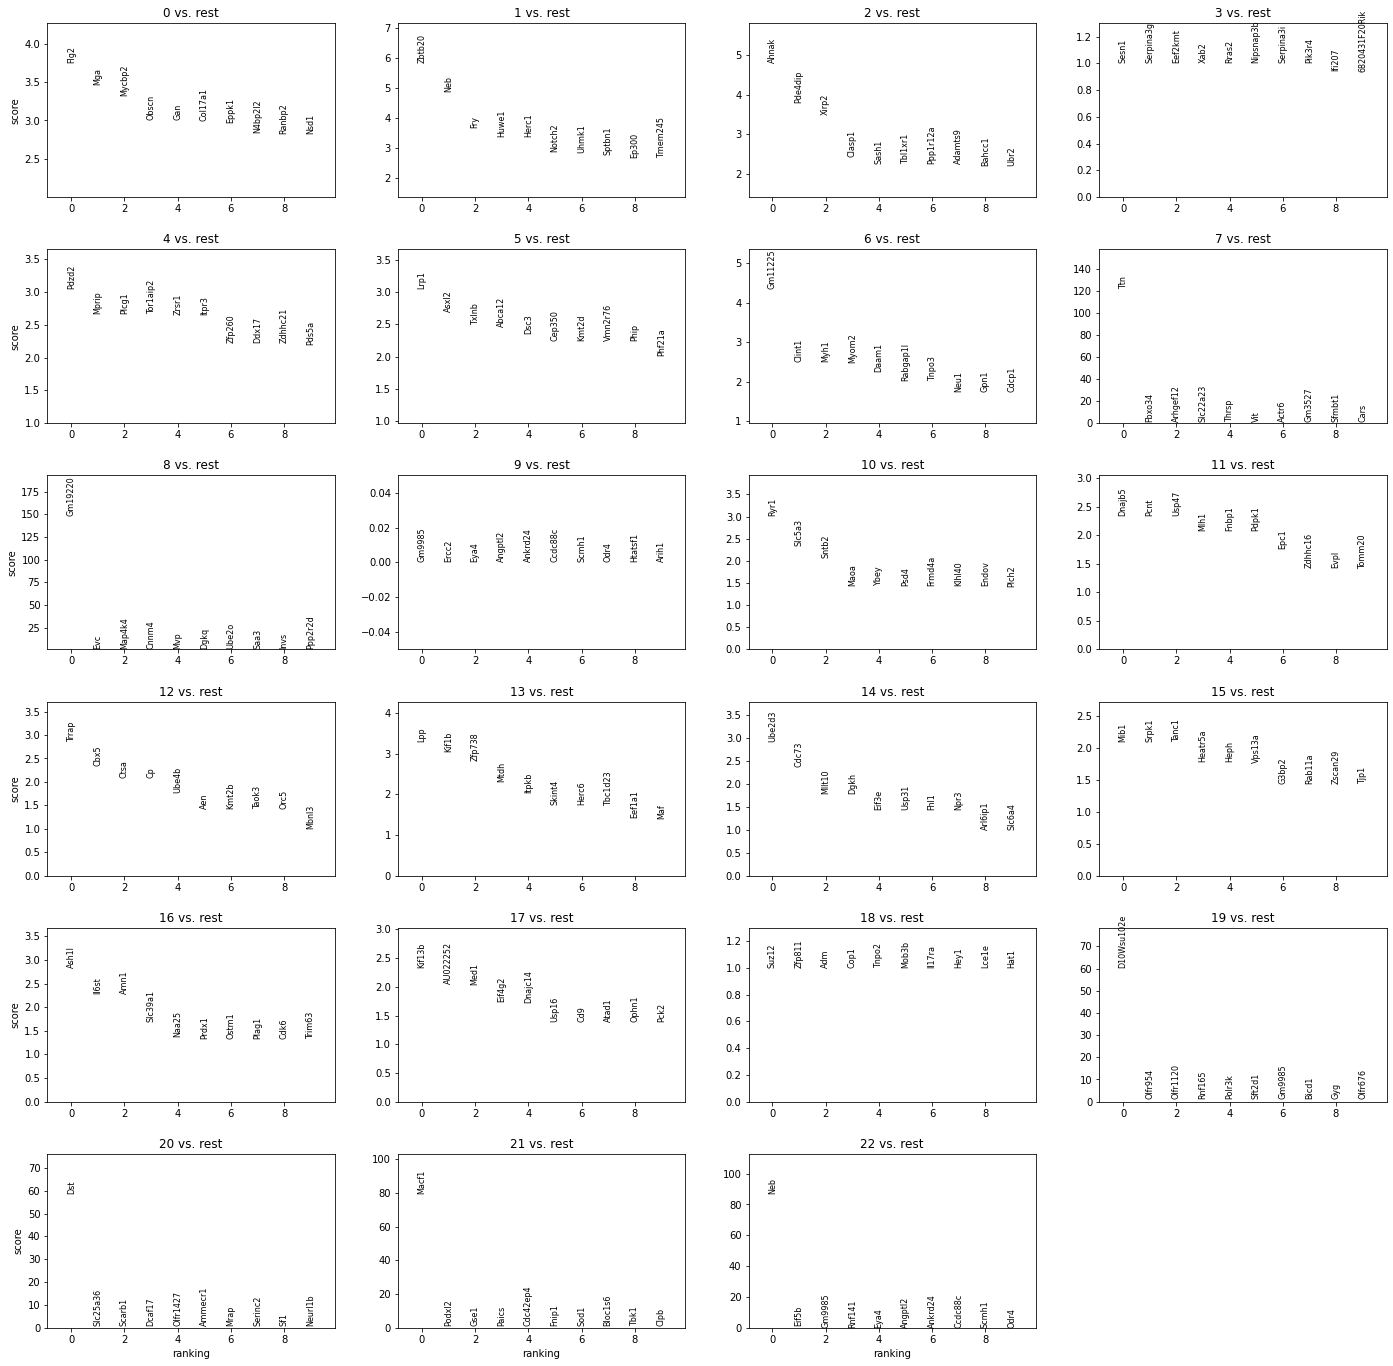

In [ ]:
sc.tl.rank_genes_groups(adata, 'louvain', method='t-test', corr_method="bonferroni")
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)

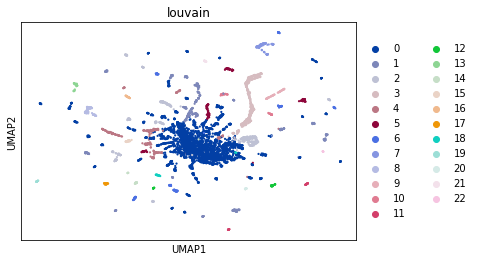

In [ ]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['louvain'])

Point out most differentialy expressed genes

**The top genes from each cluster are to be compared across different samples in order to find the genes whose expression consistantly changes in space environment.**

In [ ]:
top = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)
names = []
for l in top.values.tolist():
  names += l

namesdict = {}
for name in names:
  namesdict[name] = names.count(name)

print(namesdict)

{'Wnk1': 1, 'Ptprb': 1, 'Adgrf5': 1, 'Cd19': 1, 'Nedd4': 1, 'Slco2a1': 1, 'Ahnak': 1, 'Macf1': 1, 'Huwe1': 1, 'Esr1': 1, 'Pah': 1, 'D10Wsu102e': 1, 'Scd1': 1, 'Dnaja1': 1, 'Atf7ip': 1, 'Syne1': 1, 'Chrnb1': 1, 'Mprip': 1, 'Crebbp': 1, 'Flna': 1, 'C2cd2': 1, 'Ptprc': 1, 'Lpp': 1, 'Ubr4': 1, 'Krit1': 1, 'Mga': 1, 'Tspan5': 1, 'Chpf2': 1, 'Sptbn1': 1, 'Brwd1': 1, 'Ecpas': 1, 'Mpp1': 1, 'Lmod1': 1, 'Neb': 1, 'Tnrc6b': 1, 'Picalm': 1, 'Sptan1': 1, 'Top3b': 1, 'Abca3': 1, 'Nrd1': 1, 'Smg1': 1, 'Nckap5': 1, 'Utrn': 1, 'Grb10': 1, 'Slc1a1': 1, 'Cep350': 1, 'Ppp1r9a': 1, 'Stag2': 1, 'Rnf144a': 1, 'Bcl6': 1, 'Drc1': 1, 'Atp13a3': 1, 'Dnah6': 1, 'Ampd3': 1, 'Shprh': 1, 'Nebl': 1, 'Rapgef5': 1, 'Pde4dip': 1, 'Plcg1': 1, 'Cxcl15': 1, 'Fdx1': 1, 'Renbp': 1, 'Dach1': 1, 'Cmklr1': 1, 'Zfp282': 1, 'Atxn1': 1, 'Zfp236': 1, 'Rnf24': 1, 'Cux1': 1, 'Podxl': 1, 'Pum1': 1, 'Tmem120b': 1, 'Sorl1': 1, 'Secisbp2l': 1, 'Atp2b4': 1, 'Fam126b': 1, 'Arhgap30': 1, 'Rab9': 1, 'Cfhr2': 1, 'Setx': 1, 'Parp9': 1, 'Slain

In [ ]:
top = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)
names = []
for l in top.values.tolist():
  names += l

for n in names:
    if namesdict.get(n):
      namesdict[n] += 1
    else:
      namesdict[n] = names.count(n)

sorteddict = sorted(namesdict.items(), key=lambda x: x[1], reverse=True)
print(sorteddict)

[('Macf1', 8), ('Neb', 8), ('Ahnak', 7), ('D10Wsu102e', 7), ('Scd1', 6), ('Flna', 6), ('Gm19220', 6), ('Huwe1', 5), ('Tnrc6b', 5), ('Mycbp2', 5), ('Dst', 5), ('Ttn', 5), ('Lpp', 4), ('Mga', 4), ('Sptbn1', 4), ('Cep350', 4), ('Pum1', 4), ('Zbtb20', 4), ('Gm9985', 4), ('Gm11225', 4), ('Wnk1', 3), ('Ptprb', 3), ('Syne1', 3), ('Mprip', 3), ('Ptprc', 3), ('Ubr4', 3), ('Sptan1', 3), ('Smg1', 3), ('Utrn', 3), ('Syne2', 3), ('Ash1l', 3), ('Nsd1', 3), ('Rpl14', 3), ('Mib1', 3), ('Birc6', 3), ('Pds5a', 3), ('Ncl', 3), ('Dsc3', 3), ('Ccnl1', 3), ('Mast4', 3), ('Gm20369', 3), ('Lrrc8d', 3), ('Arhgap31', 3), ('Eya4', 3), ('Atf7ip', 2), ('Crebbp', 2), ('Brwd1', 2), ('Ecpas', 2), ('Picalm', 2), ('Abca3', 2), ('Atp13a3', 2), ('Nebl', 2), ('Pde4dip', 2), ('Plcg1', 2), ('Atp2b4', 2), ('Slain2', 2), ('Myh11', 2), ('Mau2', 2), ('Dmbt1', 2), ('Myo18a', 2), ('Plec', 2), ('Fn1', 2), ('Golgb1', 2), ('Baz1b', 2), ('Atp5b', 2), ('Add1', 2), ('Aff4', 2), ('Dnm2', 2), ('Akap9', 2), ('Mkln1', 2), ('Comt', 2), ('Fr